# Nelder-Mead Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
# Objective function
def f_nm(x):
    x1, x2 = x
    return - (x1 - 1)**2 + (x2 - 2)**4

In [3]:
# Initial simplex
initial_simplex = np.array([
    [-5.0,  5.0],
    [ 0.0,  0.0],
    [ 5.0, -5.0]
])

# Store simplex history
simplex_history = []

def callback_nm(xk, state=None):
    if hasattr(state, "simplex"):
        simplex_history.append(state.simplex.copy())

In [4]:
# Run Nelder-Mead
res_nm = minimize(
    f_nm,
    x0=initial_simplex[0],
    method="Nelder-Mead",
    options={"maxiter": 5, "initial_simplex": initial_simplex},
    callback=callback_nm,
    
)

print("Best point found:", res_nm.x)
print("Function value:", res_nm.fun)

Best point found: [-3.28125  3.28125]
Function value: -15.634245872497559


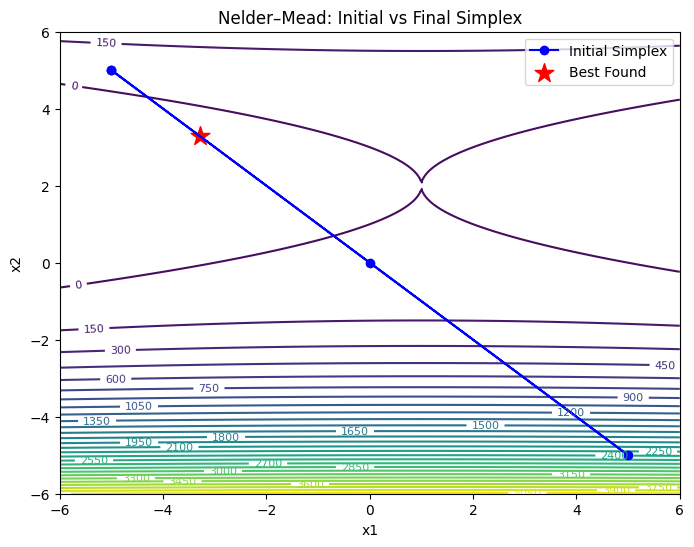

In [5]:
# Plotting
x1 = np.linspace(-6, 6, 400)
x2 = np.linspace(-6, 6, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = f_nm([X1, X2])

plt.figure(figsize=(8, 6))
contours = plt.contour(X1, X2, Z, levels=40, cmap="viridis")
plt.clabel(contours, inline=True, fontsize=8)

simp_start = np.vstack([initial_simplex, initial_simplex[0]])
plt.plot(simp_start[:, 0], simp_start[:, 1], "b-o", label="Initial Simplex")

if simplex_history:
    simp_final = np.vstack([simplex_history[-1], simplex_history[-1][0]])
    plt.plot(simp_final[:, 0], simp_final[:, 1], "g-o", label="Final Simplex")

plt.scatter(res_nm.x[0], res_nm.x[1], c="red", marker="*", s=200, label="Best Found")
plt.title("Nelder–Mead: Initial vs Final Simplex")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()